In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import src.load_datasets
import src.modelling

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

sns.color_palette("Paired")
sns.set_theme(style="whitegrid")

# About this notebook
We'll use the notebook for the general purpose encoding (OHE) of the features ...
 - model
 - tuning
 - scoring


# Load Data

In [9]:
X_train, y_train = src.load_datasets.load_train_data(path="../../data/raw/dataset_train.csv")
X_test = src.load_datasets.load_test_data(path="../../data/raw/X_test.csv")
X_train.head(5)

Loading train data ...
Loading test data ...


,dataset,model,tuning,scoring,encoder
0,1169,KNC,model,ACC,BUCV2RGLMME
1,1169,KNC,model,ACC,BUCV2TE
2,1169,KNC,model,ACC,CBE
3,1169,KNC,model,ACC,CE
4,1169,KNC,model,ACC,CV10RGLMME


# Quick Analysis

In [10]:
COLS_OF_INTEREST: list = ["model", "tuning", "scoring"]

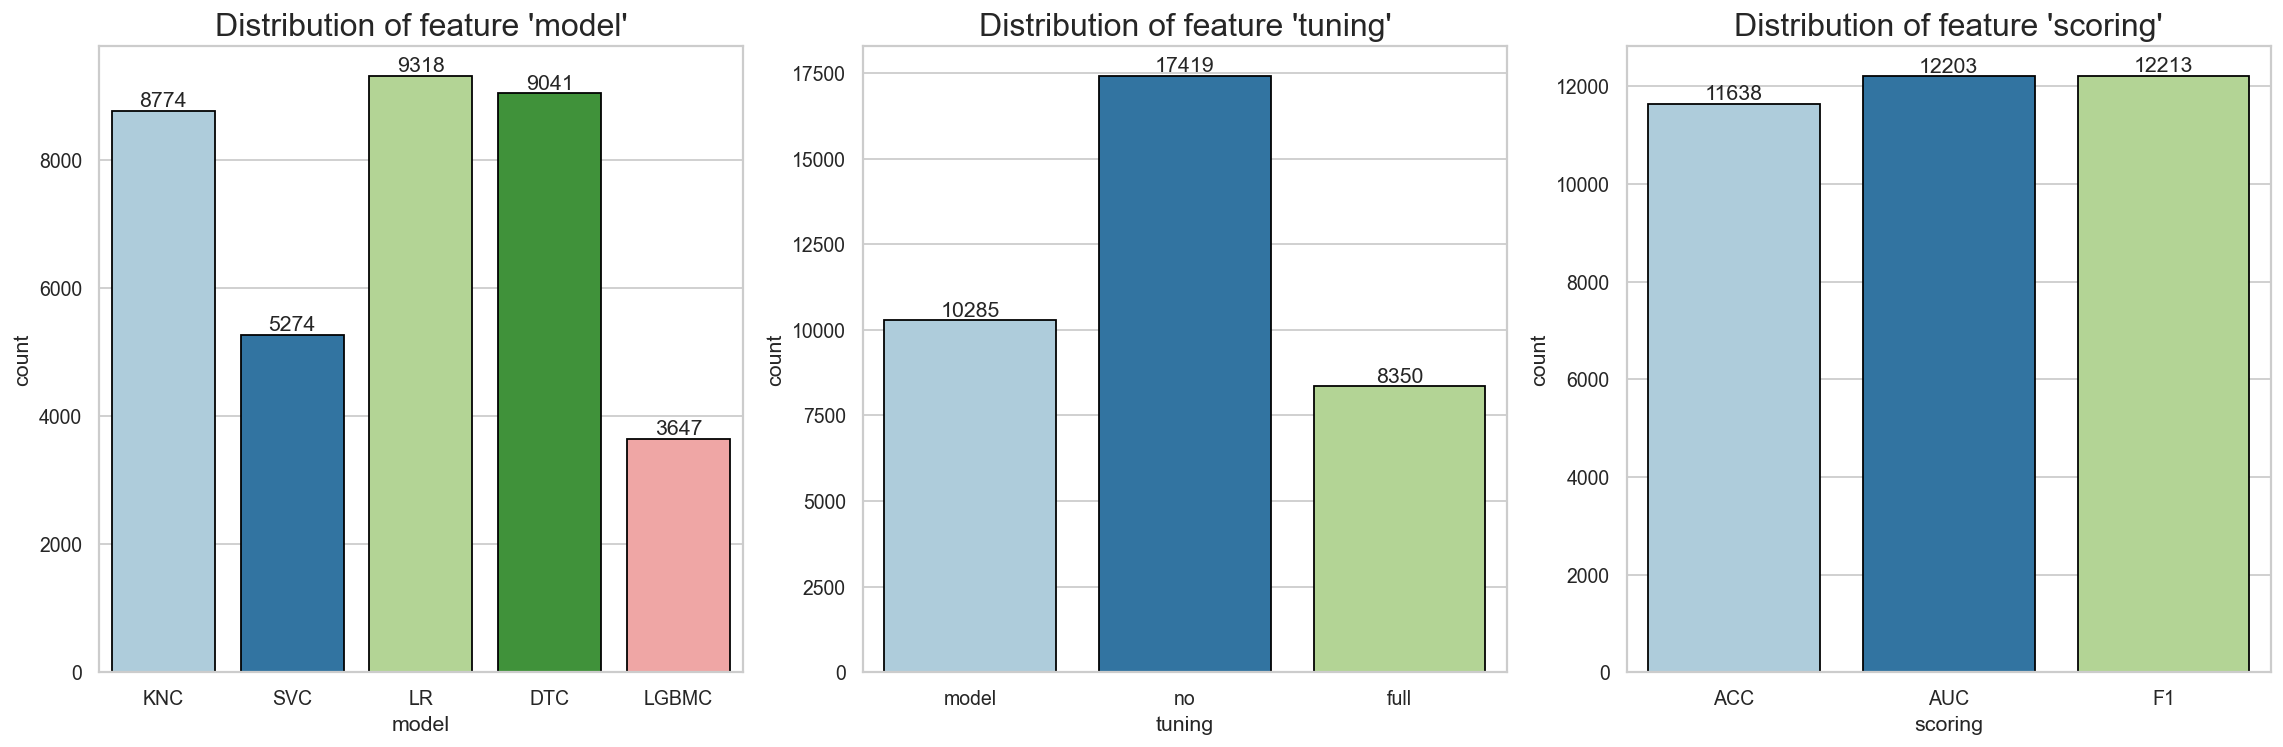

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=len(COLS_OF_INTEREST), figsize=(18,6), dpi=128)
for col, ax in zip(COLS_OF_INTEREST, axes.flatten()):
    ax.set_title(f"Distribution of feature '{col}'", size=18)
    g = sns.countplot(data=X_train, x=col, ax=ax, edgecolor="black", palette="Paired")
    ax.bar_label(g.containers[0])
fig.tight_layout()
plt.show()

**Findings**:
- All of the `COLS_OF_INTEREST` do not have many classes, i.e. we can easily apply One Hot Encoding on it without getting too much features out of it

# Encoding
We will use the One Hot Encoding

In [12]:
def ohe_encode_train_data(X_train: pd.DataFrame, cols_to_encode: list) -> (pd.DataFrame, OneHotEncoder):
    """
    Function to One Hot Encode the train data: Fits and transforms the OHE Object on the train data;
    more specifically: The provided cols_to_encode (list of features). Function also makes sure that a
    pd.DataFrame is returned by dropping the old features and concatenating the encoded ones.

    :param X_train: pd.DataFrame -- Provided Train Dataset
    :param cols_to_encode: list -- Provided list of features to apply OHE on

    :return: Tuple with pd.DataFrame with encoded features and fitted OHE object
    """

    # Get DataFrame with only relevant features, i.e. cols_to_encode
    X_train_cats = X_train[cols_to_encode]

    # Fit OneHotEncoding object
    ohe = OneHotEncoder(handle_unknown="ignore", dtype=np.float32)
    X_train_cats_encoded = ohe.fit_transform(X_train_cats).toarray()

    # Transform encoded data to pandas dataframe
    X_train_cats_encoded = pd.DataFrame(X_train_cats_encoded, columns=ohe.get_feature_names_out(), index=X_train.index)

    # Drop old features
    feats_to_drop = list(ohe.feature_names_in_)
    X_train = X_train.drop(columns=feats_to_drop, axis=1)

    # Concat old dataframe with new encoded features
    X_train_encoded = pd.concat([X_train, X_train_cats_encoded], axis=1)

    return X_train_encoded, ohe


def ohe_encode_test_data(X_test: pd.DataFrame, cols_to_encode: list, ohe: OneHotEncoder) -> pd.DataFrame:
    """
    Function to apply the fitted OHE object on the test set features provided in param cols_to_encode.
    Also makes sure that pd.DataFrame is returned by dropping the old features and concatenating the encoded ones.

    :param X_test: pd.DataFrame -- Provided Test Dataset
    :param cols_to_encode: list -- Provided list of features to apply OHE on
    :param ohe: OneHotEncoder -- Fitted OHE object

    :return: pd.DataFrame -- Encoded Test Dataset
    """

    # Get DataFrame with only relevant features, i.e. cols_to_encode and transform them
    X_test_cats = X_test[cols_to_encode]
    X_test_cats_encoded = ohe.transform(X_test_cats).toarray()

    # Transform to pandas DataFrame
    X_test_cats_encoded = pd.DataFrame(X_test_cats_encoded, columns=ohe.get_feature_names_out(), index=X_test.index)

    # Drop old features
    feats_to_drop = list(ohe.feature_names_in_)
    X_test = X_test.drop(columns=feats_to_drop, axis=1)

    # Concat old dataframe with new encoded features
    X_test_encoded = pd.concat([X_test, X_test_cats_encoded], axis=1)

    return X_test_encoded

In [13]:
# Apply on Train Set
X_train_encoded, ohe = ohe_encode_train_data(X_train, COLS_OF_INTEREST)
X_train_encoded.head(5)

,dataset,encoder,model_DTC,model_KNC,model_LGBMC,model_LR,model_SVC,tuning_full,tuning_model,tuning_no,scoring_ACC,scoring_AUC,scoring_F1
0,1169,BUCV2RGLMME,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1169,BUCV2TE,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1169,CBE,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1169,CE,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1169,CV10RGLMME,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [14]:
# Apply on Test Set
X_test_encoded = ohe_encode_test_data(X_test, COLS_OF_INTEREST, ohe)
X_test_encoded.head(5)

,dataset,encoder,model_DTC,model_KNC,model_LGBMC,model_LR,model_SVC,tuning_full,tuning_model,tuning_no,scoring_ACC,scoring_AUC,scoring_F1
0,881,BE,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,881,BUCV10RGLMME,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,881,BUCV10TE,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,881,BUCV2RGLMME,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,881,BUCV2TE,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
